https://github.com/JayadeepVarma/DM_PA_1.git

In [1]:
import pandas as pd
import json
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

path= r'D:\Data Mining\Programming Assignment - 1\Data Files\student_5\train.json'
# Loading the training dataset from the JSON file
data = []
with open(path, 'r') as f:
    for line in f:
        data.append(json.loads(line))
        
df = pd.DataFrame(data)
print(df.head())
tweets = df['Tweet'].astype(str)

vectorizer_count = CountVectorizer()
t_count = vectorizer_count.fit_transform(tweets)
print("Dimensionality of token count matrix:", t_count.shape)

vectorizer_tfidf = TfidfVectorizer()
x_tfidf = vectorizer_tfidf.fit_transform(tweets)
print("Dimensionality of TF-IDF feature count matrix:", x_tfidf.shape)

              ID                                              Tweet  anger  \
0  2017-En-30344  Live simply. Dream big. Be grateful. Give love...  False   
1  2017-En-31519  Come to the @BullSkitComedy FUNdraiser this Fr...  False   
2  2017-En-41145                    @bldmovs sadly beautiful photo.  False   
3  2017-En-30651  @eachus At least he's willing to discuss, bett...  False   
4  2017-En-30133  @PriiiincesssE thanks for distracting me from ...  False   

   anticipation  disgust   fear    joy   love  optimism  pessimism  sadness  \
0         False    False  False   True  False      True      False    False   
1         False    False  False  False  False     False      False    False   
2         False    False  False   True   True      True      False     True   
3         False    False  False  False  False      True       True    False   
4         False    False  False   True   True      True      False    False   

   surprise  trust  
0     False   True  
1     False  F

In [2]:
from sklearn.decomposition import PCA

selected_classes = ['joy', 'anger', 'sadness', 'fear']
df_filtered = df[(df['joy'] == True) | (df['anger'] == True) | (df['sadness'] == True) | (df['fear'] == True)]

tweets_filtered = df_filtered['Tweet']

vectorizer_count = CountVectorizer()
t_count = vectorizer_count.fit_transform(tweets_filtered)
pca_count = PCA(n_components=2)
t_count_reduced = pca_count.fit_transform(t_count.toarray())

vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(tweets_filtered)
pca_tfidf = PCA(n_components=2)
X_tfidf_reduced = pca_tfidf.fit_transform(X_tfidf.toarray())

print("Dimensionality of reduced token count matrix:", t_count_reduced.shape)
print("Dimensionality of reduced TF-IDF feature count matrix:", X_tfidf_reduced.shape)

Dimensionality of reduced token count matrix: (2701, 2)
Dimensionality of reduced TF-IDF feature count matrix: (2701, 2)


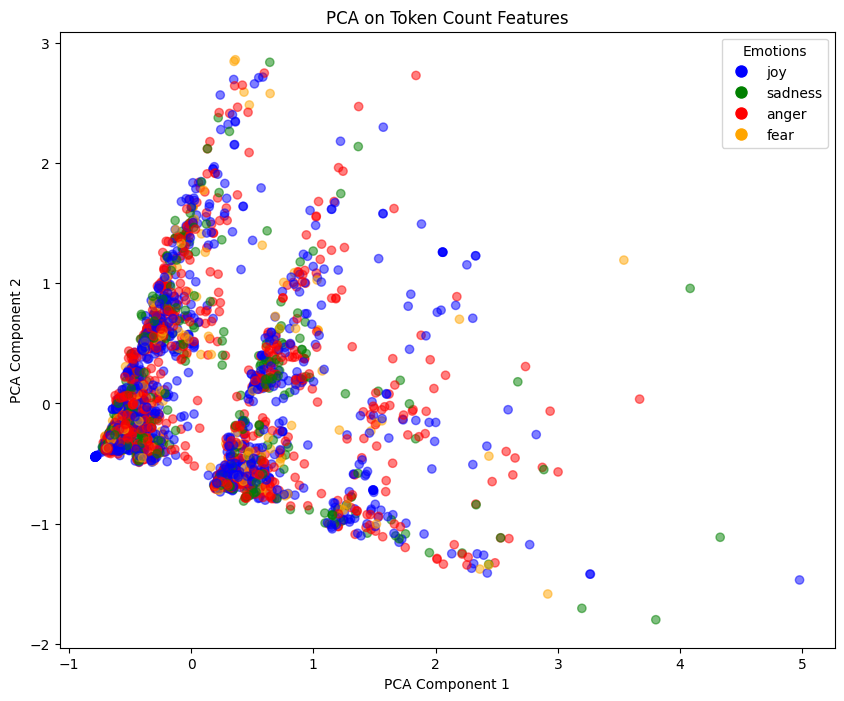

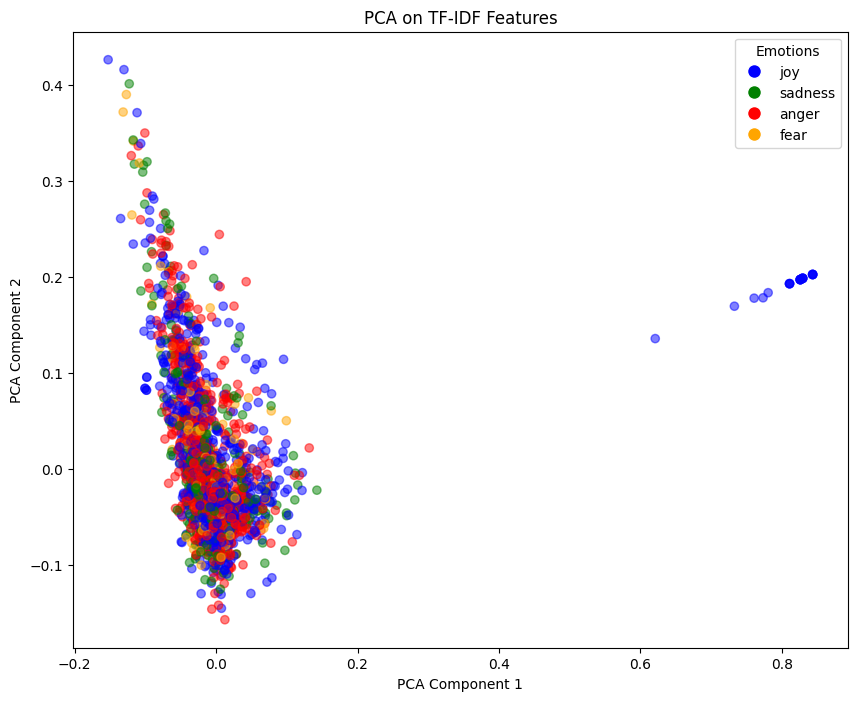

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

class_colors = {
    'joy': 'blue',
    'anger': 'red',
    'sadness': 'green',
    'fear': 'orange'
}
    
df_filtered['label'] = df_filtered.apply(lambda row: 'joy' if row['joy'] else 
                                                     'anger' if row['anger'] else 
                                                     'sadness' if row['sadness'] else 
                                                     'fear', axis=1)
colors = df_filtered['label'].map(class_colors)

# Plotting the 2d plot
def plot_2d(data, title, colors, labels):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=colors, alpha=0.5)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")

    legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=class_colors[label], markersize=10) for label in labels]
    plt.legend(legend, labels, title="Emotions", loc="upper right")
    plt.show()

unique_labels = df_filtered['label'].unique()
plot_2d(t_count_reduced, "PCA on Token Count Features", colors, unique_labels)
plot_2d(X_tfidf_reduced, "PCA on TF-IDF Features", colors, unique_labels)

First Plot:
There is a huge amount of overlap between emotions in the plot which seems to overlap which makes it difficult to distinguish any emotions are separable

Second Plot: 
Similar to the first plot there is also a overlap between emotions but there is a slight separation for the joy emotion as they are isolated from the remaining points

In summary there might be a one visually separable class which can be joy which has minute data points, but for the first plot there is no visually separable class.